In [18]:
import pandas as pd
import io
import os
import sys
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
## Loading the dataset ##

data = pd.read_csv("/home/ankan/Projects/infilect/small-2oq-c1r.csv",error_bad_lines=False)

b'Skipping line 2432: expected 32 fields, saw 84\nSkipping line 9540: expected 32 fields, saw 56\nSkipping line 13789: expected 32 fields, saw 55\n'
b'Skipping line 68770: expected 32 fields, saw 47\nSkipping line 71522: expected 32 fields, saw 47\n'
b'Skipping line 110279: expected 32 fields, saw 34\n'
b'Skipping line 350612: expected 32 fields, saw 54\n'
b'Skipping line 420752: expected 32 fields, saw 57\nSkipping line 421906: expected 32 fields, saw 56\nSkipping line 423202: expected 32 fields, saw 47\nSkipping line 423240: expected 32 fields, saw 47\nSkipping line 423307: expected 32 fields, saw 47\nSkipping line 423308: expected 32 fields, saw 47\nSkipping line 423318: expected 32 fields, saw 47\n'
b'Skipping line 595328: expected 32 fields, saw 43\n'
b'Skipping line 609638: expected 32 fields, saw 50\n'
b'Skipping line 652410: expected 32 fields, saw 43\n'
b'Skipping line 657032: expected 32 fields, saw 52\n'
b'Skipping line 680159: expected 32 fields, saw 53\nSkipping line 68388

In [3]:
len(data)-data['productId'].nunique()

1206

In [4]:
data.head()

,productId,title,description,imageUrlStr,mrp,sellingPrice,specialPrice,productUrl,categories,productBrand,...,keySpecsStr,detailedSpecsStr,specificationList,sellerName,sellerAverageRating,sellerNoOfRatings,sellerNoOfReviews,sleeve,neck,idealFor
0,SPWE7T5EF93UGMZZ,Smilzo Saree Panty Slp/2808 Women's Shapewear,The wide and comfortable of Fashion Shapewears...,http://img.fkcdn.com/image/shapewear/x/7/7/slp...,799.0,798.0,798.0,http://dl.flipkart.com/dl/smilzo-saree-panty-s...,Apparels>Women>Lingerie & Sleepwear>Shapewears,Smilzo,...,Type: Shapewear Briefs;Women's Shapewear;Fabri...,Type: Shapewear Briefs;Women's Shapewear;Fabri...,NaN,SHAPING SYSTEMS INDIA PVT LTD,3.9,7.0,0.0,NaN,NaN,NaN
1,BLODYGFS6D4CZZDZ,Inblue Fashions Round Neck Women's Stitched Bl...,Inblue Fashions Black & White lace Silk Blouse...,http://img.fkcdn.com/image/blouse/q/z/m/inbblu...,3098.0,1550.0,1550.0,http://dl.flipkart.com/dl/inblue-fashions-roun...,Apparels>Women>Ethnic Wear>Blouses,Inblue Fashions,...,Round Neck;Fabric: Silk;Pattern: Floral Print,Round Neck;Fabric: Silk;Pattern: Floral Print,NaN,Inblue Fashions,4.2,23.0,1.0,NaN,Round Neck,NaN
2,BLODYGFSHBVBKJUK,Inblue Fashions Round Neck Women's Stitched Bl...,Inblue Fashions Black & White lace Silk Blouse...,http://img.fkcdn.com/image/blouse/q/z/m/inbblu...,3098.0,1549.0,1549.0,http://dl.flipkart.com/dl/inblue-fashions-roun...,Apparels>Women>Ethnic Wear>Blouses,Inblue Fashions,...,Round Neck;Fabric: Silk;Pattern: Floral Print,Round Neck;Fabric: Silk;Pattern: Floral Print,NaN,Inblue Fashions,4.2,23.0,1.0,NaN,Round Neck,NaN
3,BLODYGFSRTZAWHHE,Inblue Fashions Round Neck Women's Stitched Bl...,Inblue Fashions Black & White lace Silk Blouse...,http://img.fkcdn.com/image/blouse/q/z/m/inbblu...,3098.0,1549.0,1549.0,http://dl.flipkart.com/dl/inblue-fashions-roun...,Apparels>Women>Ethnic Wear>Blouses,Inblue Fashions,...,Round Neck;Fabric: Silk;Pattern: Floral Print,Round Neck;Fabric: Silk;Pattern: Floral Print,NaN,Inblue Fashions,4.2,23.0,1.0,NaN,Round Neck,NaN
4,BLODYGFSFARJXJB2,Inblue Fashions Round Neck Women's Stitched Bl...,Inblue Fashions Black & White lace Silk Blouse...,http://img.fkcdn.com/image/blouse/q/z/m/inbblu...,3098.0,1550.0,1550.0,http://dl.flipkart.com/dl/inblue-fashions-roun...,Apparels>Women>Ethnic Wear>Blouses,Inblue Fashions,...,Round Neck;Fabric: Silk;Pattern: Floral Print,Round Neck;Fabric: Silk;Pattern: Floral Print,NaN,Inblue Fashions,4.2,23.0,1.0,NaN,Round Neck,NaN


In [5]:
## Checking for null values ##

data.apply(lambda x: x.isnull().sum(), axis=0)

productId                    0
title                       15
description             353048
imageUrlStr               1263
mrp                          4
sellingPrice              4396
specialPrice              4396
productUrl                   4
categories                   6
productBrand                 8
productFamily             5775
inStock                      4
codAvailable                 4
offers                 1063787
discount                    96
shippingCharges           5769
deliveryTime            577038
size                    291789
color                     5834
sizeUnit               1052349
storage                1063787
displaySize            1063787
keySpecsStr               7923
detailedSpecsStr         18854
specificationList      1063787
sellerName                5775
sellerAverageRating          4
sellerNoOfRatings            4
sellerNoOfReviews            4
sleeve                  415786
neck                    687925
idealFor               1063787
dtype: i

In [6]:
## Duplicates based of ProductId ##

product_ids = data['productId']
data[product_ids.isin(product_ids[product_ids.duplicated()])].sort_values("productId")

,productId,title,description,imageUrlStr,mrp,sellingPrice,specialPrice,productUrl,categories,productBrand,...,keySpecsStr,detailedSpecsStr,specificationList,sellerName,sellerAverageRating,sellerNoOfRatings,sellerNoOfReviews,sleeve,neck,idealFor
268697,Attractive Saree Handcrafted From Surat.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
268695,Attractive Saree Handcrafted From Surat.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
417541,BLOECBGZGTVXZ4MZ,Redesign Square Neck Women's Stitched Blouse,Redesign offering designer Paded PurpleColor b...,http://img.fkcdn.com/image/blouse/h/p/w/rd1165...,2499.0,1195.0,1195.0,http://dl.flipkart.com/dl/redesign-square-neck...,Apparels>Women>Ethnic Wear>Blouses,Redesign,...,Square Neck;Sleeve: Sleevless;Fabric: Polysati...,Square Neck;Sleeve: Sleevless;Fabric: Polysati...,NaN,Dinesh Kumar Bothra,3.6,27.0,1.0,Sleevless,Square Neck,NaN
417542,BLOECBGZGTVXZ4MZ,Redesign Square Neck Women's Stitched Blouse,Redesign offering designer Paded PurpleColor b...,http://img.fkcdn.com/image/blouse/h/p/w/rd1165...,2499.0,1195.0,1195.0,http://dl.flipkart.com/dl/redesign-square-neck...,Apparels>Women>Ethnic Wear>Blouses,Redesign,...,Square Neck;Sleeve: Sleevless;Fabric: Polysati...,Square Neck;Sleeve: Sleevless;Fabric: Polysati...,NaN,Dinesh Kumar Bothra,3.6,27.0,1.0,Sleevless,Square Neck,NaN
155778,BLOEEUBFDT5EGGYN,Inblue Fashions Round Neck Women's Stitched Bl...,Inblue Fashions Red & White Lace Silk Blouse. ...,http://img.fkcdn.com/image/blouse/z/m/t/inbblu...,3298.0,1649.0,1649.0,http://dl.flipkart.com/dl/inblue-fashions-roun...,Apparels>Women>Ethnic Wear>Blouses,Inblue Fashions,...,Round Neck;Sleeve: Without Sleeve;Fabric: Dupi...,Round Neck;Sleeve: Without Sleeve;Fabric: Dupi...,NaN,Inblue Fashions,4.2,23.0,1.0,Without Sleeve,Round Neck,NaN
155779,BLOEEUBFDT5EGGYN,Inblue Fashions Round Neck Women's Stitched Bl...,Inblue Fashions Red & White Lace Silk Blouse. ...,http://img.fkcdn.com/image/blouse/z/m/t/inbblu...,3298.0,1649.0,1649.0,http://dl.flipkart.com/dl/inblue-fashions-roun...,Apparels>Women>Ethnic Wear>Blouses,Inblue Fashions,...,Round Neck;Sleeve: Without Sleeve;Fabric: Dupi...,Round Neck;Sleeve: Without Sleeve;Fabric: Dupi...,NaN,Inblue Fashions,4.2,23.0,1.0,Without Sleeve,Round Neck,NaN
423630,BLOEFFDP6G4SUNW6,Indian Saree Mandir Round Neck Women's Stitche...,This Designer Collection Is Handpicked From Ko...,http://img.fkcdn.com/image/blouse/n/w/6/wbd004...,1285.0,899.0,899.0,http://dl.flipkart.com/dl/indian-saree-mandir-...,Apparels>Women>Ethnic Wear>Blouses,Indian Saree Mandir,...,Round Neck;Sleeve: Half Sleeve;Fabric: Raw Sil...,Round Neck;Sleeve: Half Sleeve;Fabric: Raw Sil...,NaN,bapitanti,3.2,13.0,3.0,Half Sleeve,Round Neck,NaN
423631,BLOEFFDP6G4SUNW6,Indian Saree Mandir Round Neck Women's Stitche...,This Designer Collection Is Handpicked From Ko...,http://img.fkcdn.com/image/blouse/n/w/6/wbd004...,1285.0,899.0,899.0,http://dl.flipkart.com/dl/indian-saree-mandir-...,Apparels>Women>Ethnic Wear>Blouses,Indian Saree Mandir,...,Round Neck;Sleeve: Half Sleeve;Fabric: Raw Sil...,Round Neck;Sleeve: Half Sleeve;Fabric: Raw Sil...,NaN,bapitanti,3.2,13.0,3.0,Half Sleeve,Round Neck,NaN
425197,BLOEHCTF7NJZPZCY,Singaar Round Neck Women's Stitched Blouse,"""Nothing Makes A Woman Look More Beautiful Tha...",http://img.fkcdn.com/image/blouse/m/n/j/embroi...,4100.0,1298.0,1298.0,http://dl.flipkart.com/dl/singaar-round-neck-w...,Apparels>Women>Ethnic Wear>Blouses,Singaar,...,Round Neck;Sleeve: Half sleeve;Fabric: Chiffon...,Round Neck;Sleeve: Half sleeve;Fabric: Chiffon...,NaN,Meena Sharma,5.0,1.0,0.0,Half sleeve,Round Neck,NaN
425196,BLOEHCTF7NJZPZCY,Singaar Round Neck Women's Stitched Blouse,"""Nothing Makes A Woman Look More Beautiful Tha...",http://img.fkcdn.com/image/blouse/m/n/j/embroi...,4100.0,1298.0,1298.0,http://dl.flipkart.com/dl/singaar-round-neck-w...,Apparels>Women>Ethnic Wear>Blouses,Singaar,...,Round Neck;Sleeve: Half sle

In [7]:
## Deleting Duplicates ##

data_no_dup_product_id = data.drop_duplicates(subset='productId', keep="last")

In [8]:
## NULL in category column ##

data_no_dup_product_id[data_no_dup_product_id.categories.isnull()]

,productId,title,description,imageUrlStr,mrp,sellingPrice,specialPrice,productUrl,categories,productBrand,...,keySpecsStr,detailedSpecsStr,specificationList,sellerName,sellerAverageRating,sellerNoOfRatings,sellerNoOfReviews,sleeve,neck,idealFor
30323,SARE79YMG4XZQPEY,Manisha Sarees Printed Fashion Silk Sari,NaN,http://img.fkcdn.com/image/sari/p/d/y/1-1-mt-1...,1099.0,NaN,NaN,http://dl.flipkart.com/dl/manisha-sarees-print...,NaN,Manisha Sarees,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN
143622,SAREDZY6FHFTRGWN,Radhika Sarees Printed Daily Wear Georgette Sari,NaN,http://img.fkcdn.com/image/sari/g/w/n/1-1-rs-5...,4130.0,NaN,NaN,http://dl.flipkart.com/dl/radhika-sarees-print...,NaN,Radhika Sarees,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN
268696,Premium Quality Superb Silk Saree With Blouse ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
268697,Attractive Saree Handcrafted From Surat.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
data_no_dup_product_id.apply(lambda x: x.isnull().sum(), axis=0)

productId                    0
title                       13
description             352622
imageUrlStr               1261
mrp                          2
sellingPrice              4394
specialPrice              4394
productUrl                   2
categories                   4
productBrand                 6
productFamily             5773
inStock                      2
codAvailable                 2
offers                 1062581
discount                    94
shippingCharges           5767
deliveryTime            576321
size                    291237
color                     5831
sizeUnit               1051143
storage                1062581
displaySize            1062581
keySpecsStr               7921
detailedSpecsStr         18838
specificationList      1062581
sellerName                5773
sellerAverageRating          2
sellerNoOfRatings            2
sellerNoOfReviews            2
sleeve                  415175
neck                    686850
idealFor               1062581
dtype: i

In [10]:
## Taking the selected columns ##

data_no_dup_product_id_selected_col = data_no_dup_product_id[['productId', 'title','imageUrlStr', 'productUrl', 'categories']]

In [11]:
## Checking for Null values in productUrl columns ##

data_no_dup_product_id_selected_col[data_no_dup_product_id_selected_col.productUrl.isnull()]


,productId,title,imageUrlStr,productUrl,categories
268696,Premium Quality Superb Silk Saree With Blouse ...,NaN,NaN,NaN,NaN
268697,Attractive Saree Handcrafted From Surat.,NaN,NaN,NaN,NaN


In [12]:
## Deleting columns which has null in productUrl column ##

data_no_dup_product_id_selected_col = data_no_dup_product_id_selected_col.dropna(axis=0, subset=['productUrl'])

In [20]:
## Filling the category column with appropiate category where it was null ##

for i in list(data_no_dup_product_id_selected_col[data_no_dup_product_id_selected_col.categories.isnull()].index):
    data_no_dup_product_id_selected_col.categories[i] = 'Apparels>Women>Ethnic Wear>Saree Falls'

In [21]:
data_no_dup_product_id_selected_col.apply(lambda x: x.isnull().sum(), axis=0)

productId         0
title            11
imageUrlStr    1259
productUrl        0
categories        0
dtype: int64

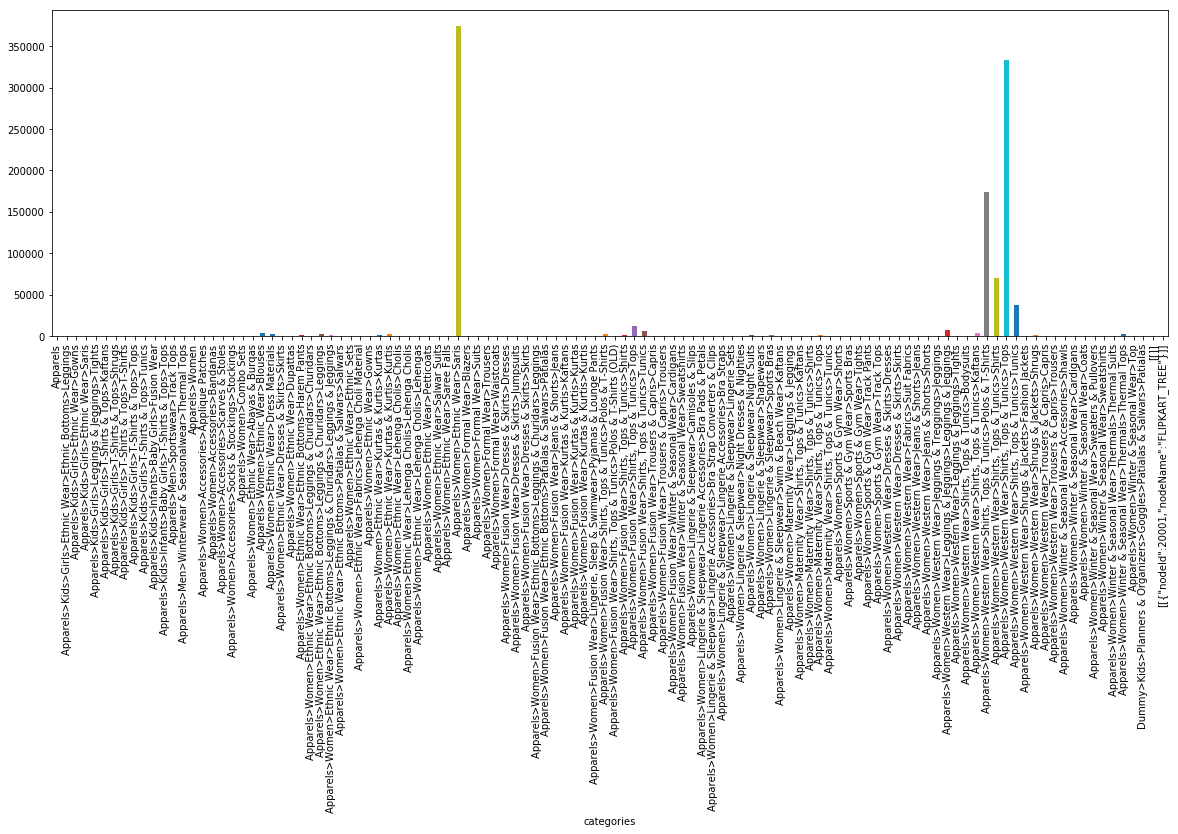

In [22]:
## Plotting number of products per category ##

plt.figure(figsize=(20,6))
data_no_dup_product_id_selected_col.groupby('categories')['productId'].nunique().plot(kind='bar')

plt.show()

In [23]:
## All categories with their respective product counts ##

data_no_dup_product_id_selected_col.groupby(['categories']).productId.count().sort_values(ascending=False)

categories
Apparels>Women>Ethnic Wear>Saris                                                         374655
Apparels>Women>Western Wear>Shirts, Tops & Tunics>Tops                                   333075
Apparels>Women>Western Wear>Shirts, Tops & Tunics>Polos & T-Shirts                       174317
Apparels>Women>Western Wear>Shirts, Tops & Tunics>Shirts                                  70916
Apparels>Women>Western Wear>Shirts, Tops & Tunics>Tunics                                  37545
Apparels>Women>Fusion Wear>Shirts, Tops & Tunics>Tops                                     12456
Apparels>Women>Western Wear>Leggings & Jeggings>Leggings & Jeggings                        7354
Apparels>Women>Fusion Wear>Shirts, Tops & Tunics>Tunics                                    5836
Apparels>Women>Ethnic Wear>Blouses                                                         4206
Apparels>Women>Western Wear>Shirts, Tops & Tunics>Kaftans                                  3508
Apparels>Women>Ethnic Wear>Ku

In [24]:
## Searching thes dataframe for all tops data ##
count = 0
productId = []
title = []
imageUrlStr = []
productUrl = []
categories = []
for index, row in data_no_dup_product_id_selected_col.iterrows():
    category = row.categories.rpartition(">")[2]
    if category.find("Tops") is not -1:
        count += 1
        productId.append(row.productId)
        title.append(row.title)
        imageUrlStr.append(row.imageUrlStr)
        productUrl.append(row.productUrl)
        categories.append(row.categories)

In [26]:
download_df = pd.DataFrame(list(zip(productId, title, imageUrlStr, productUrl, categories)), columns=data_no_dup_product_id_selected_col.columns)

In [27]:
len(download_df)

350638

In [ ]:
## Dumping the pickle file which will be used for downloading the images ##

import pickle
with open('download_df.pickle', 'wb') as handle:
    pickle.dump(download_df,handle, protocol=pickle.HIGHEST_PROTOCOL)